In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
try:
    data = pd.read_csv('StressLevelDataset(1).csv', sep=';')
except FileNotFoundError:
    print(" File 'dataset.csv' tidak ditemukan. Pastik an file berada di folder yang sama.")
    raise SystemExit

print("===== Informasi Dataset Asli =====")
print(data.info())
print("\n===== 5 Data Teratas =====")
print(data.head())

===== Informasi Dataset Asli =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13

In [42]:
data.to_excel("data_asli.xlsx", index=False)
print("\nFile dataset asli disimpan sebagai: dataset_asli.xlsx")


File dataset asli disimpan sebagai: dataset_asli.xlsx


In [43]:
data_dirty = data.copy()

In [44]:
for col in data_dirty.columns:
    missing_idx = data_dirty.sample(frac=0.05, random_state=42).index
    data_dirty.loc[missing_idx, col] = np.nan

In [45]:
num_cols = data_dirty.select_dtypes(include=[np.number]).columns
if len(num_cols) > 0:
    for col in num_cols:
        outlier_idx = np.random.choice(data_dirty.index, size=min(3, len(data_dirty)), replace=False)
        data_dirty.loc[outlier_idx, col] = data_dirty[col].mean() + data_dirty[col].std() * 10

print("\n===== DATA SETELAH DIKOTORI =====")
print(data_dirty.head())


===== DATA SETELAH DIKOTORI =====
   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0           14.0         20.0                    0.0        11.0       2.0   
1           15.0          8.0                    1.0        15.0       5.0   
2           12.0         18.0                    1.0        14.0       2.0   
3           16.0         12.0                    1.0        15.0       4.0   
4           16.0         28.0                    0.0         7.0       2.0   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0             1.0            2.0                4.0          2.0   
1             3.0            1.0                4.0          3.0   
2             1.0            2.0                2.0          2.0   
3             3.0            1.0                3.0          4.0   
4             3.0            5.0                1.0          3.0   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0          

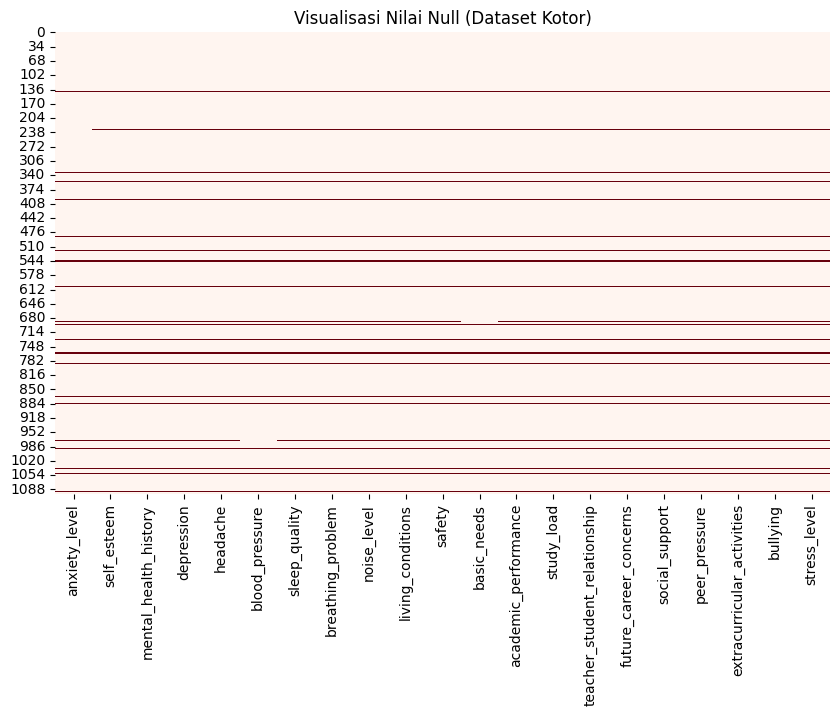

In [46]:
plt.figure(figsize=(10, 6))
sns.heatmap(data_dirty.isnull(), cbar=False, cmap="Reds")
plt.title("Visualisasi Nilai Null (Dataset Kotor)")
plt.show()

In [47]:
data_dirty.to_excel("data_kotor.xlsx", index=False)
print("\nFile dataset kotor disimpan sebagai: data_kotor.xlsx")


File dataset kotor disimpan sebagai: data_kotor.xlsx


In [48]:
data_clean = data_dirty.copy()

In [63]:
data_clean.fillna(data_clean.median(numeric_only=True), inplace=True)
for col in data_clean.select_dtypes(include=["object"]).columns:
    data_clean[col] = data_clean[col].fillna(data_clean[col].mode()[0])

print("\n=====Missing Value Setelah Pembersihan =====")
print(data_clean.isnull().sum())


=====Missing Value Setelah Pembersihan =====
anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64



===== Visualisasi Outlier (Sebelum Capping) =====


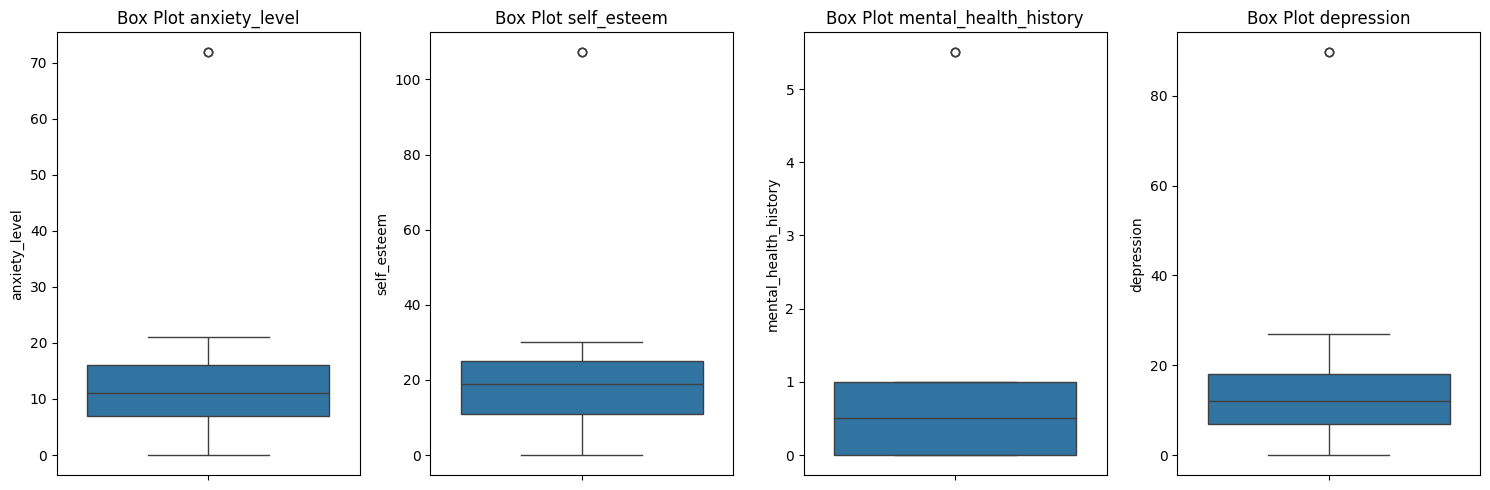


===== Data Setelah Outlier Diperbaiki =====
   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0           14.0         20.0                    0.0        11.0       2.0   
1           15.0          8.0                    1.0        15.0       5.0   
2           12.0         18.0                    1.0        14.0       2.0   
3           16.0         12.0                    1.0        15.0       4.0   
4           16.0         28.0                    0.0         7.0       2.0   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0             1.0            2.0                4.0          2.0   
1             3.0            1.0                4.0          3.0   
2             1.0            2.0                2.0          2.0   
3             3.0            1.0                3.0          4.0   
4             3.0            5.0                1.0          3.0   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0

In [ ]:
# Metode Capping
# Kita definisikan 'num_cols' di sini, setelah data bersih dari NaN
num_cols = data_clean.select_dtypes(include=[np.number]).columns
# ----------------------------------------------------
print("\n===== Visualisasi Outlier (Sebelum Capping) =====")

# Ambil 4 kolom numerik pertama untuk contoh
cols_to_plot = num_cols[:min(len(num_cols), 4)] 

if len(cols_to_plot) > 0:
    plt.figure(figsize=(15, 5))
    for i, col in enumerate(cols_to_plot):
        plt.subplot(1, len(cols_to_plot), i+1)
        sns.boxplot(y=data_clean[col]) # Gunakan data_clean
        plt.title(f'Box Plot {col}')
    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada kolom numerik untuk di-plot.")

if len(num_cols) > 0:
    for col in num_cols:
        Q1 = data_clean[col].quantile(0.25)
        Q3 = data_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        batas_bawah = Q1 - 1.5 * IQR
        batas_atas = Q3 + 1.5 * IQR
        
        # Capping menggunakan np.clip()
        data_clean[col] = np.clip(data_clean[col], a_min=batas_bawah, a_max=batas_atas)

print("\n===== Data Setelah Outlier Diperbaiki =====")
print(data_clean.head())

In [ ]:
#(One-Hot Encoding)
print("\n===== Data Setelah Label Encoding (One-Hot) =====")
cat_cols = data_clean.select_dtypes(include=["object"]).columns

if len(cat_cols) > 0:
    # Menggunakan pd.get_dummies untuk One-Hot Encoding
    data_clean_encoded = pd.get_dummies(data_clean, columns=cat_cols, drop_first=True)
    print("One-Hot Encoding selesai.")
else:
    print("Tidak ada kolom kategorikal untuk di-encode.")
    data_clean_encoded = data_clean.copy() # Salin jika tidak ada perubahan

print(data_clean_encoded.head())


===== Data Setelah Label Encoding (One-Hot) =====
Tidak ada kolom kategorikal untuk di-encode.
   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0           14.0         20.0                    0.0        11.0       2.0   
1           15.0          8.0                    1.0        15.0       5.0   
2           12.0         18.0                    1.0        14.0       2.0   
3           16.0         12.0                    1.0        15.0       4.0   
4           16.0         28.0                    0.0         7.0       2.0   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0             1.0            2.0                4.0          2.0   
1             3.0            1.0                4.0          3.0   
2             1.0            2.0                2.0          2.0   
3             3.0            1.0                3.0          4.0   
4             3.0            5.0                1.0          3.0   

   living_conditions  ... 

In [52]:
from sklearn.model_selection import train_test_split

# 1. Tentukan X (fitur) dan y (target)
#    Gunakan 'data_clean_encoded' dari Perubahan 2
TARGET_COLUMN = 'anxiety_level' # GANTI JIKA TARGET ANDA BUKAN INI
X = data_clean_encoded.drop(TARGET_COLUMN, axis=1)
y = data_clean_encoded[TARGET_COLUMN]

In [53]:
# 2. Split Data SEBELUM Scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nData di-split: {len(X_train)} data latih, {len(X_test)} data uji.")


Data di-split: 880 data latih, 220 data uji.


In [ ]:
# lakukan Scaling
scaler = StandardScaler()

# Tentukan kolom numerik yang akan di-scale
# 'num_cols' sudah kita buat di Perubahan 1
cols_to_scale = [col for col in num_cols if col in X_train.columns]

if len(cols_to_scale) > 0:
    print(f"Scaler 'belajar' dari {len(cols_to_scale)} kolom di X_train...")
    
    # 'fit' (belajar) HANYA pada X_train
    scaler.fit(X_train[cols_to_scale])

    # 'transform' (terapkan) pada X_train dan X_test
    X_train[cols_to_scale] = scaler.transform(X_train[cols_to_scale])
    X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
    
    print("Scaling selesai.")
else:
    print("Tidak ada kolom numerik untuk di-scale.")

print("\n===== Data Latih (X_train) Setelah Scaling (5 baris pertama) =====")
print(X_train.head())

Scaler 'belajar' dari 20 kolom di X_train...
Scaling selesai.

===== Data Latih (X_train) Setelah Scaling (5 baris pertama) =====
     self_esteem  mental_health_history  depression  headache  blood_pressure  \
507    -0.078358              -0.985616   -0.343644 -0.382909       -1.401377   
551    -0.078358              -0.985616    0.043974  0.320556       -1.401377   
290     1.358212               0.981146   -1.377294  0.320556        0.943132   
2       0.032147               0.981146    0.173180 -0.382909       -1.401377   
6       0.916190              -0.985616   -0.860469 -1.086373       -0.229122   

     sleep_quality  breathing_problem  noise_level  living_conditions  \
507      -0.423191           0.846551     0.315669          -0.481638   
551      -0.423191          -0.549821     0.315669          -0.481638   
290       0.212860           0.846551     1.161296           1.865214   
2        -0.423191          -0.549821    -0.529958          -0.481638   
6         0.848912

In [56]:
# 4. Simpan file yang sudah di-split
X_train.to_excel("data_train_bersih.xlsx", index=False)
X_test.to_excel("data_test_bersih.xlsx", index=False)
y_train.to_frame().to_excel("data_train_target.xlsx", index=False)
y_test.to_frame().to_excel("data_test_target.xlsx", index=False)

print("\nFile-file bersih akhir disimpan sebagai:")
print("  - data_train_bersih.xlsx (Fitur Latih)")
print("  - data_test_bersih.xlsx (Fitur Uji)")
print("  - data_train_target.xlsx (Target Latih)")
print("  - data_test_target.xlsx (Target Uji)")


File-file bersih akhir disimpan sebagai:
  - data_train_bersih.xlsx (Fitur Latih)
  - data_test_bersih.xlsx (Fitur Uji)
  - data_train_target.xlsx (Target Latih)
  - data_test_target.xlsx (Target Uji)



===== Statistik Deskriptif Data Latih (X_train) =====
        self_esteem  mental_health_history    depression      headache  \
count  8.800000e+02           8.800000e+02  8.800000e+02  8.800000e+02   
mean  -2.038773e-16           5.046468e-17 -5.904368e-17 -4.541821e-17   
std    1.000569e+00           1.000569e+00  1.000569e+00  1.000569e+00   
min   -1.956951e+00          -9.856158e-01 -1.635706e+00 -1.789838e+00   
25%   -7.413909e-01          -9.856158e-01 -7.635644e-01 -1.086373e+00   
50%    1.426525e-01          -9.856158e-01 -8.523202e-02  3.205561e-01   
75%    9.161904e-01           9.811458e-01  8.192111e-01  1.024021e+00   
max    3.126299e+00           3.931288e+00  2.821907e+00  2.430950e+00   

       blood_pressure  sleep_quality  breathing_problem   noise_level  \
count    8.800000e+02   8.800000e+02       8.800000e+02  8.800000e+02   
mean     1.453383e-16  -7.165985e-17      -7.569702e-17  1.816729e-16   
std      1.000569e+00   1.000569e+00       1.000569e+00  1.

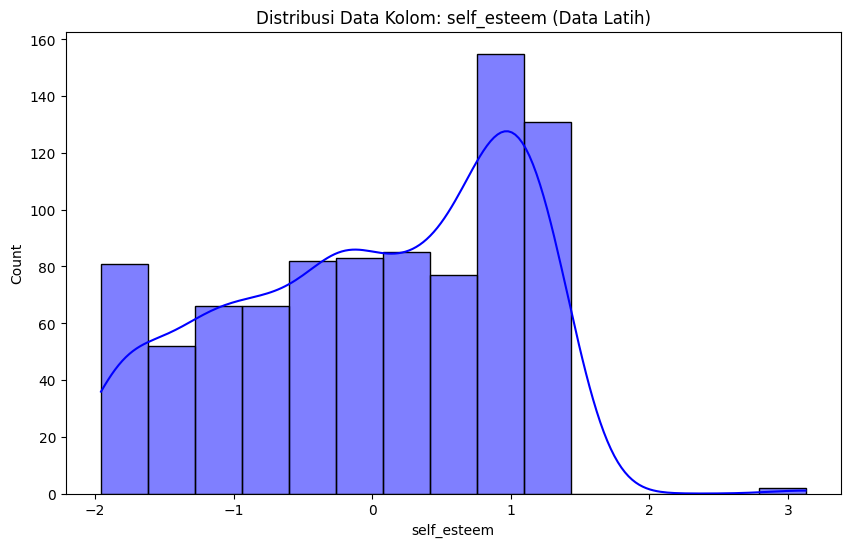


✅ Semua tahap preprocessing selesai!
   - File Asli    : data_asli.xlsx (disimpan di awal)
   - File Kotor   : data_kotor.xlsx (disimpan di awal)
   - File Latih   : data_train_bersih.xlsx
   - File Uji     : data_test_bersih.xlsx


In [57]:
# 5. (Opsional) Visualisasi/Describe, sekarang gunakan data LATIH (X_train)
print("\n===== Statistik Deskriptif Data Latih (X_train) =====")
print(X_train.describe())

if len(cols_to_scale) > 0:
    plt.figure(figsize=(10, 6))
    # Ambil kolom pertama yang di-scale untuk contoh plot
    kolom_plot = cols_to_scale[0] 
    sns.histplot(X_train[kolom_plot], kde=True, color="blue")
    plt.title(f"Distribusi Data Kolom: {kolom_plot} (Data Latih)")
    plt.show()

print("\n✅ Semua tahap preprocessing selesai!")
print("   - File Asli    : data_asli.xlsx (disimpan di awal)")
print("   - File Kotor   : data_kotor.xlsx (disimpan di awal)")
print("   - File Latih   : data_train_bersih.xlsx")
print("   - File Uji     : data_test_bersih.xlsx")